In [249]:
#Mohammad Alshurbaji
#Assignment 1 - Q1 - Lasso solution using Coordinate Minimization.
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt 
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge

In [30]:
np.random.seed(0)
A = np.random.rand(20,10)
y = np.random.rand(20)
lambdas = np.logspace(-2,3,20) #the logspace function is about  10 raising to power of... (here it means between 0.01,1000)

In [89]:
#Implementing the Coordinate Minimization for lasso 
#The objective function for lasso is: 1/2 * ||Ax-y||^2 + lambd * |x|1
#first of all: defining the threshold critiria 
def soft_threshold(b,lambd):
    if b>lambd:
        return b - lambd
    elif b < -1 * lambd:
        return b + lambd
    else:
        return 0

#Second: defining the lasso coordiante minimization (alternating):
def lasso_coordinate_min(A,y,lambd,iterations = 1000, tol=1e-6):
    x = np.random.rand(10)
    #Obtaining from the equation: ax^2 + bx + lambd * |x|
    b = 2 * A.T @ y
    a = A.T @ A
    #Ubdating each coordinate now:
    for iteration in range(iterations):
        x_old = x.copy() # to check for convergence
        #Ubdating each coordinate now:
        for j in range(A.shape[1]):
            #b_j = b[j] - a[j] @ x
            b_j = b[j] - (a[j, :] @ x) + a[j, j] * x[j]
            #x[j] = soft_threshold(b_j,lambd,a[j,j])
            x[j] = soft_threshold(b_j, lambd) / a[j, j]
        if np.linalg.norm(x-x_old, ord=2) < tol:
            break

    return x
            
    

In [90]:
solutions_cord = []
for lambd in lambdas:
    x_star = lasso_coordinate_min(A, y, lambd)
    solutions_cord.append(x_star)
    print(f"Lambda: {lambd:.2f}, Solution x: {x_star}")


Lambda: 0.01, Solution x: [-0.76314616 -0.72914162  0.48410522  2.24466257  0.13057301 -0.44982008
  1.20503763  0.4118856   0.         -0.85678832]
Lambda: 0.02, Solution x: [-0.71136474 -0.70953224  0.45532093  2.20717808  0.11917897 -0.42051534
  1.20103841  0.37719083  0.         -0.83804963]
Lambda: 0.03, Solution x: [-0.61645461 -0.67359571  0.40256112  2.13847239  0.09829469 -0.3668018
  1.19370975  0.31360114  0.         -0.80370134]
Lambda: 0.06, Solution x: [-0.44248052 -0.60770632  0.30585284  2.01253226  0.06001319 -0.26834283
  1.18027081  0.1970307   0.         -0.74074451]
Lambda: 0.11, Solution x: [-0.1433516  -0.48862571  0.13562372  1.79023039  0.         -0.10087574
  1.15219309  0.          0.         -0.63034059]
Lambda: 0.21, Solution x: [ 0.00000000e+00 -3.34069667e-01  5.34344485e-04  1.56784719e+00
  0.00000000e+00 -1.62538171e-02  1.04475792e+00  0.00000000e+00
  0.00000000e+00 -5.31856586e-01]
Lambda: 0.38, Solution x: [ 0.         -0.01270797  0.          1.

In [246]:
#Now implementing using the sklearn
solutions_sklearn = []

for lambd in lambdas:
    lasso = Lasso(alpha=lambd, max_iter=1000,tol=1e-6)
    lasso.fit(A, y)
    solutions_sklearn.append(lasso.coef_)
    print(f"Lambda: {lambd:.2f}, Solution x: {lasso.coef_}")


Lambda: 0.01, Solution x: [-0.29380093 -0.04682689 -0.          0.4664346  -0.06875046 -0.11930207
  0.         -0.         -0.05588214 -0.1433396 ]
Lambda: 0.02, Solution x: [-0.05387684 -0.         -0.          0.23082467 -0.01904627 -0.
  0.         -0.04357337 -0.         -0.        ]
Lambda: 0.03, Solution x: [-0.         -0.         -0.          0.05020811 -0.         -0.
  0.         -0.         -0.         -0.        ]
Lambda: 0.06, Solution x: [-0. -0. -0.  0. -0. -0.  0. -0. -0. -0.]
Lambda: 0.11, Solution x: [-0. -0. -0.  0. -0. -0.  0. -0. -0. -0.]
Lambda: 0.21, Solution x: [-0. -0. -0.  0. -0. -0.  0. -0. -0. -0.]
Lambda: 0.38, Solution x: [-0. -0. -0.  0. -0. -0.  0. -0. -0. -0.]
Lambda: 0.70, Solution x: [-0. -0. -0.  0. -0. -0.  0. -0. -0. -0.]
Lambda: 1.27, Solution x: [-0. -0. -0.  0. -0. -0.  0. -0. -0. -0.]
Lambda: 2.34, Solution x: [-0. -0. -0.  0. -0. -0.  0. -0. -0. -0.]
Lambda: 4.28, Solution x: [-0. -0. -0.  0. -0. -0.  0. -0. -0. -0.]
Lambda: 7.85, Solution x:

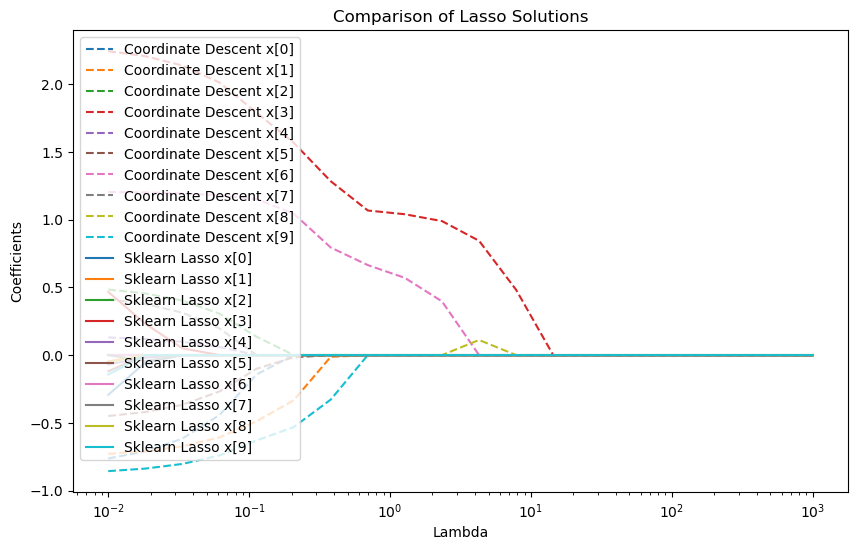

Lambda: 0.01, Coord x: [-0.76314616 -0.72914162  0.48410522  2.24466257  0.13057301 -0.44982008
  1.20503763  0.4118856   0.         -0.85678832]
, Sklearn x: [-0.29380093 -0.04682689 -0.          0.4664346  -0.06875046 -0.11930207
  0.         -0.         -0.05588214 -0.1433396 ]
Lambda: 0.02, Coord x: [-0.71136474 -0.70953224  0.45532093  2.20717808  0.11917897 -0.42051534
  1.20103841  0.37719083  0.         -0.83804963]
, Sklearn x: [-0.05387684 -0.         -0.          0.23082467 -0.01904627 -0.
  0.         -0.04357337 -0.         -0.        ]
Lambda: 0.03, Coord x: [-0.61645461 -0.67359571  0.40256112  2.13847239  0.09829469 -0.3668018
  1.19370975  0.31360114  0.         -0.80370134]
, Sklearn x: [-0.         -0.         -0.          0.05020811 -0.         -0.
  0.         -0.         -0.         -0.        ]
Lambda: 0.06, Coord x: [-0.44248052 -0.60770632  0.30585284  2.01253226  0.06001319 -0.26834283
  1.18027081  0.1970307   0.         -0.74074451]
, Sklearn x: [-0. -0. -0.

In [247]:
# Convert solutions to a numpy array for plotting (shape: len(lambdas) x 10)
solutions_sklearn = np.array(solutions_sklearn)
solutions_cord = np.array(solutions_cord)
# Plotting
plt.figure(figsize=(10, 6))

# Plotting Coordinate min solutions
for i in range(solutions_cord.shape[1]):
    plt.plot(lambdas, solutions_cord[:, i], label=f'Coordinate Descent x[{i}]', linestyle='--')

# Plotting Scikit-Learn Lasso solutions
for i in range(solutions_sklearn.shape[1]):
    plt.plot(lambdas, solutions_sklearn[:, i], label=f'Sklearn Lasso x[{i}]', linestyle='-')

plt.xscale('log')  # Use logarithmic scale for lambda
plt.xlabel('Lambda')
plt.ylabel('Coefficients')
plt.title('Comparison of Lasso Solutions')
plt.legend()
plt.show()

# Print comparison of the last few lambda values
for i in range(len(lambdas)):
    print(f"Lambda: {lambdas[i]:.2f}, Coord x: {solutions_cord[i]}\n, Sklearn x: {solutions_sklearn[i]}")

In [115]:
#Question 2: Least Squares Extension:
#Frobenus is used for matrices; it's the same as least squares but for matrices
np.random.seed(0)
A = np.random.rand(10,10)
X_star = np.random.rand(10,10)
C = np.random.rand(10,10)
I = np.eye(10)
Y = A @ X_star + X_star @ C
vec_Y = Y.flatten()
first = np.kron(I,A.T@A) + np.kron(I,A.T@C.T) + np.kron(I,C@A) + np.kron(I,C@C.T)
W = np.kron(I,A) + np.kron(C.T, I)
vec_X = np.linalg.inv(W.T@V) @W.T@vec_Y
second = np.kron(I,A.T) + np.kron(C,I)
# vec_X = np.linalg.inv(first) @ second @ vec_Y
vec_X_star = X_star.flatten()
print(vec_X, '\n', vec_X_star)

[ 5.65400718e+01  8.82261602e+01 -1.38470885e+02 -5.19290753e+01
  3.04061809e+01 -5.53098850e+00  2.05525162e+02  1.02100219e+02
 -2.38670365e+02  1.05071618e+02 -1.30878826e+02 -1.97876502e+02
  3.26766962e+02  1.20253189e+02 -5.83821154e+01  1.57959425e+01
 -4.63717104e+02 -2.23991099e+02  5.40483741e+02 -2.50698302e+02
 -5.57570848e+01 -7.03134592e+01  1.35111189e+02  4.24119471e+01
 -2.21004480e+01 -2.24216130e+00 -1.98340691e+02 -9.32739499e+01
  2.35788159e+02 -1.08613360e+02  3.59307108e+01  1.76743915e+01
 -6.35189182e+01 -1.92438554e+01  9.72625066e+00  7.65396266e+00
  8.50558457e+01  3.42654022e+01 -9.42065516e+01  5.50542320e+01
  1.03358140e+02  1.90538492e+02 -2.83105327e+02 -1.05549626e+02
  5.16512752e+01 -2.21028175e+01  4.10446406e+02  1.97358754e+02
 -4.63619941e+02  2.10372088e+02 -3.24983883e+01 -6.31427084e+01
  9.63072985e+01  3.19472369e+01 -1.21472085e+01  1.00910722e+01
 -1.35410956e+02 -6.14775313e+01  1.53587289e+02 -7.36642764e+01
 -1.47541808e+01 -9.59103

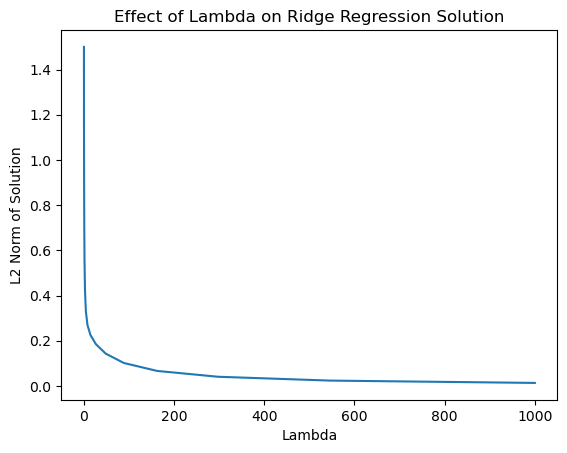

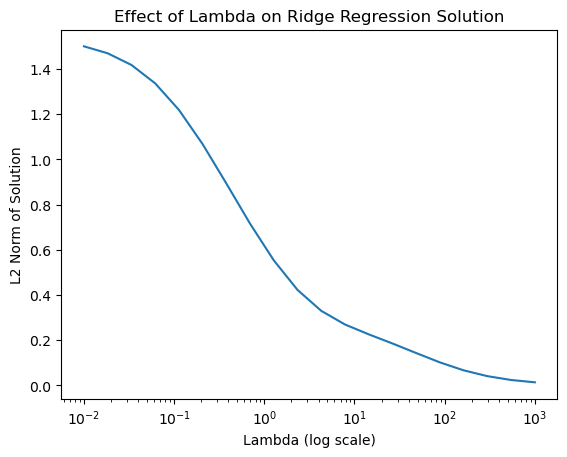

These plots show that the ridge is monotone


In [248]:
#Question 3: Ridge Regression
np.random.seed(0)
A = np.random.rand(20,10)
y = np.random.rand(20)
lambdas = np.logspace(-2,3,20)
norm_values = []

for lam in lambdas:
    # Ridge regression solution: (A^T A + lambda * I)^(-1) A^T y
    I = np.eye(10)
    ridge_solution = np.linalg.inv(A.T @ A + lam * I) @ A.T @ y
    norm = np.linalg.norm(ridge_solution, 2)  
    norm_values.append(norm)
#Two plots have been done for clarity.
plt.plot(lambdas, norm_values) 
plt.xlabel('Lambda')
plt.ylabel('L2 Norm of Solution')
plt.title('Effect of Lambda on Ridge Regression Solution')
plt.show()
#logarithmic scale for clarity
plt.plot(lambdas, norm_values)
plt.xscale('log')  
plt.xlabel('Lambda (log scale)')
plt.ylabel('L2 Norm of Solution')
plt.title('Effect of Lambda on Ridge Regression Solution')
plt.show()
print("These plots show that the ridge is monotone")

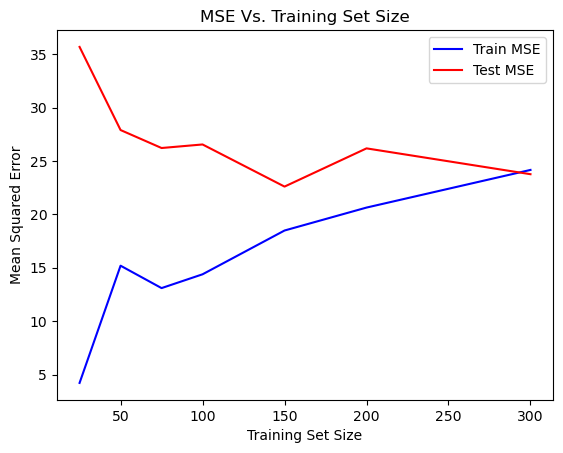

In [244]:
#Question 4: Linear Regression and its Extension: Section 1,2
data = pd.read_csv("housing.data", delim_whitespace=True, header=None)
X = data.iloc[:,:-1]
y = data.iloc[:, -1].values
n = x.shape[0]
d = x.shape[1]
np.random.seed(2)
perm = np.random.permutation(len(X))
X = X.iloc[perm].values  # This is to convert to NumPy array after shuffling
y = y[perm]
Ntrain = 300
Xtrain = X[:Ntrain]  
ytrain = y[:Ntrain]
Xtest = X[Ntrain:]
ytest = y[Ntrain:]
#2 Now extract the rst n records of the training data
trainSets = [25,50,75,100,150,200,300]
trainErrors = []
testErrors = []
for trainSSets in trainSets: #trainSSets: train subset
    XtrainSSet = Xtrain[:trainSSets]
    ytrainSSet = ytrain[:trainSSets]
    #Now: Standarization: ZScore standarization.
    scaler = StandardScaler()
    XtrainScaled = scaler.fit_transform(XtrainSSet)
    XtestScaled = scaler.fit_transform(Xtest)
    #Adding the bias term
    XtrainAug = np.hstack((np.ones((XtrainScaled.shape[0],1)), XtrainScaled))
    XtestAug = np.hstack((np.ones((XtestScaled.shape[0],1)), XtestScaled))
    #To fit the linear regression model using least squres:
    LinReg = LinearRegression(fit_intercept = False)
    LinReg.fit(XtrainAug, ytrainSSet)
    #Prediction phase:
    ytrainPred = LinReg.predict(XtrainAug)
    ytestPred = LinReg.predict(XtestAug)
    #Calculating MSE:
    trainMSE = mean_squared_error(ytrainSSet, ytrainPred)
    testMSE = mean_squared_error(ytest, ytestPred)
    trainErrors.append(trainMSE)
    testErrors.append(testMSE)
#Plot MSE versus training set size:
plt.plot(trainSets,trainErrors,label = 'Train MSE', color = 'b')
plt.plot(trainSets, testErrors, label = 'Test MSE', color = 'r')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.title('MSE Vs. Training Set Size')
plt.legend()
plt.show()

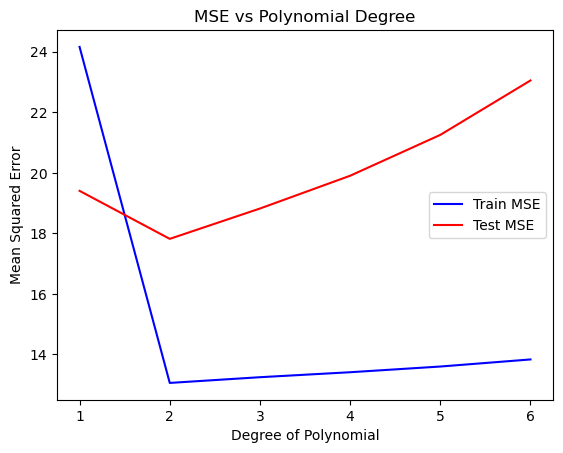

In [234]:
#Question 4: Section 3
trainErrorsPoly = []
testErrorsPoly = []
degrees = [1, 2, 3, 4, 5, 6]

for deg in degrees:
    # Expansions
    XtrainExpand = np.power(Xtrain,deg)
    XtestExpand = np.power(Xtest,deg)
    XtrainPoly = np.hstack([Xtrain,XtrainExpand])
    XtestPoly = np.hstack([Xtest, XtestExpand])
    
    # Now: Standarization: ZScore standarization.
    XtrainScaled = scaler.fit_transform(XtrainPoly)
    XtestScaled = scaler.transform(XtestPoly)
    LinReg = LinearRegression()
    LinReg.fit(XtrainScaled, ytrain)
    
    # Predictions phase
    ytrainPred = LinReg.predict(XtrainScaled)
    ytestPred = LinReg.predict(XtestScaled)
    
    # Calculating MSE
    trainMSE = mean_squared_error(ytrain, ytrainPred)
    testMSE = mean_squared_error(ytest, ytestPred)
    trainErrorsPoly.append(trainMSE)
    testErrorsPoly.append(testMSE)

# Plot MSE vs degree
plt.plot(degrees, trainErrorsPoly, label='Train MSE',color = 'b')
plt.plot(degrees, testErrorsPoly, label='Test MSE',color = 'r')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs Polynomial Degree')
plt.legend()
plt.show()


C:\Users\Mohammad\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.40037e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


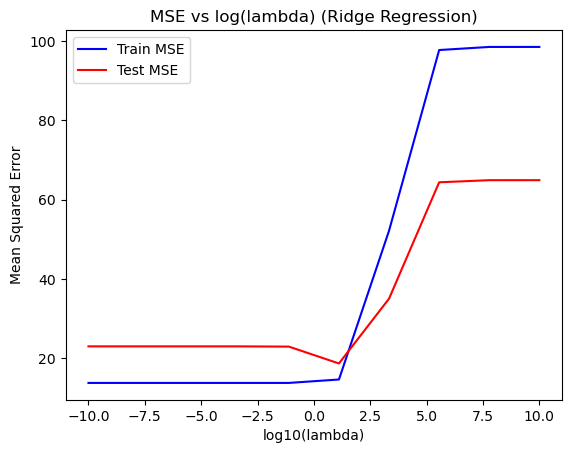

In [241]:
#Question 4: Section 4: Ridge Regression
# Ridge regression for degree 6 polynomial
lambdas = np.concatenate([[0], np.logspace(-10, 10, 10)])
trainErrorsRidge = []
testErrorsRidge = []

# Expansions
XtrainExpand = np.power(Xtrain,6)
XtestExpand = np.power(Xtest,6)
XtrainPoly = np.hstack([Xtrain,XtrainExpand])
XtestPoly = np.hstack([Xtest, XtestExpand])

# Standardization:ZScore standarization.
XtrainScaled = scaler.fit_transform(XtrainPoly)
XtestScaled = scaler.transform(XtestPoly)

for l in lambdas:
    ridge = Ridge(alpha=l)
    ridge.fit(XtrainScaled, ytrain)
    
    # Predictions
    ytrainPred = ridge.predict(XtrainScaled)
    ytestPred = ridge.predict(XtestScaled)
    
    # Calculate MSE
    trainMSE = mean_squared_error(ytrain, ytrainPred)
    testMSE = mean_squared_error(ytest, ytestPred)
    trainErrorsRidge.append(trainMSE)
    testErrorsRidge.append(testMSE)

# Plot MSE vs log10(lambda)
plt.plot(np.log10(lambdas + 1e-10), trainErrorsRidge, label='Train MSE',color = 'b')
plt.plot(np.log10(lambdas + 1e-10), testErrorsRidge, label='Test MSE',color = 'r')
plt.xlabel('log10(lambda)')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs log(lambda) (Ridge Regression)')
plt.legend()
plt.show()
